<a href="https://colab.research.google.com/github/karthikvadloori/MinorProjectDSApril/blob/main/Mini_Project_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
# Data : Images

!mkdir images

In [106]:
#Preprocessing

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

t=[]
images=[]
flat=[]

ddir='/content/images'
categories=['Apple','Banana','Orange']

for c in categories:
  cnum=categories.index(c)
  path = os.path.join(ddir,c)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_arr = resize(img_array,(100,100,3))
    flat.append(img_arr.flatten())
    images.append(img_arr)
    t.append(cnum)

flat = np.array(flat)
t = np.array(t)
images= np.array(images)

In [107]:
len(flat[0])

30000

<BarContainer object of 3 artists>

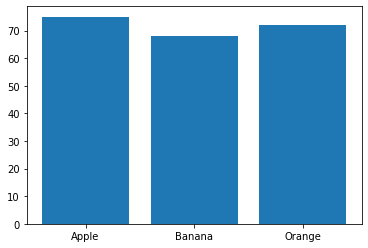

In [108]:
#Data images - Count of categories

unique,count=np.unique(t,return_counts=True)
plt.bar(categories,count)

In [109]:
#Splitting data into Training and Testing

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(flat,t,test_size=0.3,random_state=100)

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [111]:
y_pred = clf.predict(x_test)
y_pred

array([2, 1, 2, 2, 0, 2, 2, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 0, 1, 1, 0,
       0, 2, 0, 0, 0, 1, 2, 2, 1, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2,
       0, 2, 1, 0, 1, 0, 2, 1, 1, 1, 2, 2, 1, 0, 0, 1, 0, 0, 0, 1, 0])

In [112]:
y_test

array([1, 1, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 0, 1, 1, 0,
       0, 2, 0, 2, 0, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 2, 2, 2, 2, 2,
       0, 2, 1, 0, 1, 0, 2, 1, 1, 1, 2, 2, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [114]:
#Finding the accuracy score and displaying it with confusion matrix

from sklearn.metrics import accuracy_score,confusion_matrix

accuracy_score(y_pred,y_test)

0.8461538461538461

In [116]:
confusion_matrix(y_pred,y_test)

array([[16,  1,  2],
       [ 0, 20,  3],
       [ 2,  2, 19]])

In [117]:
# Saving the model using Pickle Library - Pickling

import pickle 

pickle.dump(clf,open('img_model.p','wb'))

model = pickle.load(open('img_model.p','rb'))

Enter the image URL that you want to classifyhttps://post.healthline.com/wp-content/uploads/2020/09/Do_Apples_Affect_Diabetes_and_Blood_Sugar_Levels-732x549-thumbnail-1-732x549.jpg
(549, 732, 3)
Predicted Output: Apple


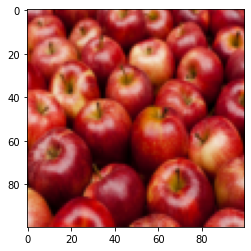

In [121]:
#Testing new image

flat = []

url = input("Enter the image URL that you want to classify")
img = imread(url)
img_resized = resize(img,(100,100,3))
flat.append(img_resized.flatten())
flat = np.array(flat)

print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat)
y_out = categories[y_out[0]]
print(f'Predicted Output: {y_out}')